# The PISA Data

## By Senga Mukanda

## Introduction
The dataset that I chose to explore was the PISA 2012 assessment.

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines
* how well students have learned the school curriculum,
* how well prepared they are for life beyond school.

PISA is a unique global survey that examines how well prepared 15 year old students are for life after they have completed school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# These are the libraries that I will use for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import zipfile
import seaborn as sb

# This will make the plots to be embedded inline.
%matplotlib inline

In [2]:
# Now that we've cleaned our master data and saved it as a .csv file 
# now we want to open so that we can analyze and visualize it.
modified_pisa_data = pd.read_csv('C:/Users/Lauren.Mukanda/Downloads/modified_pisa_data.csv', low_memory=False)
modified_pisa_data.info()
modified_pisa_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country Code           485490 non-null  object 
 1   Birth Year             485490 non-null  int64  
 2   Gender                 485490 non-null  object 
 3   Math Score Average     485490 non-null  float64
 4   Reading Score Average  485490 non-null  float64
 5   Science Score Average  485490 non-null  float64
 6   Maximum Math Score     485490 non-null  float64
 7   Maximum Reading Score  485490 non-null  float64
 8   Maximum Science Score  485490 non-null  float64
 9   Mom Work Status        485490 non-null  int64  
 10  Dad Work Status        485490 non-null  object 
 11  Parents Work Status    485490 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 44.4+ MB


,Country Code,Birth Year,Gender,Math Score Average,Reading Score Average,Science Score Average,Maximum Math Score,Maximum Reading Score,Maximum Science Score,Mom Work Status,Dad Work Status,Parents Work Status
0,Albania,1996,Female,366.18634,261.01424,371.91348,406.8469,406.8496,408.8400,2,3,Only dad working
1,Albania,1996,Female,470.56396,384.68832,478.12382,486.1427,406.2936,548.9929,1,1,Both working
2,Albania,1996,Female,505.53824,405.18154,486.60946,533.2684,431.3938,512.7191,1,1,Both working
3,Albania,1996,Female,449.45476,477.46376,453.97240,498.6836,547.3630,481.5740,1,1,Both working
4,Albania,1996,Female,385.50398,256.01010,367.15778,418.5309,311.7707,422.1746,3,3,Both working


# Univariate Exploration
> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

### What is the average score that the students obtained for each each subject?
* The first thing I want to look at is the students average score in the subjects that they wrote on.

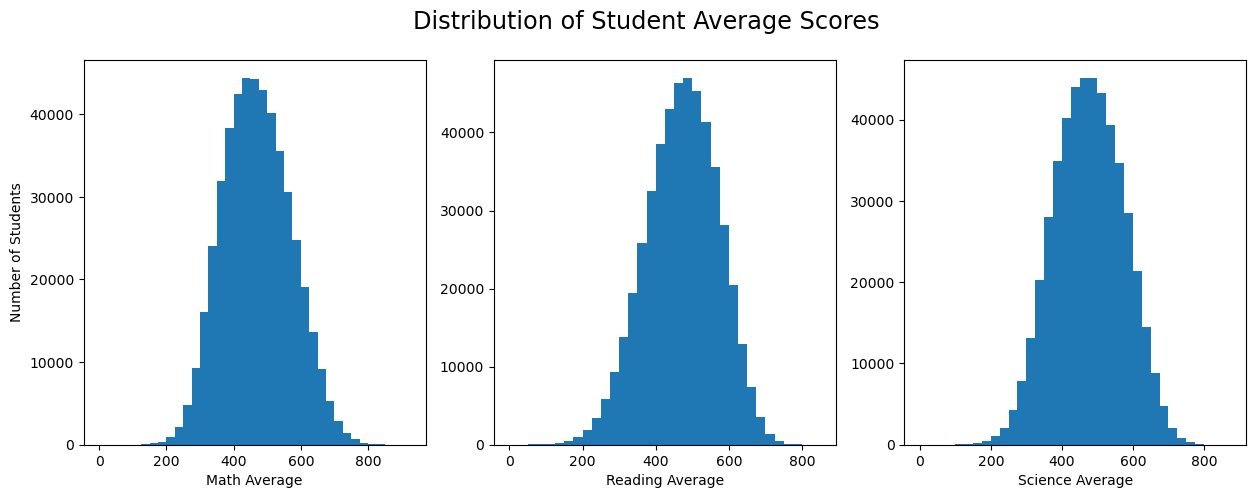

In [3]:
# First you want to select the bin size
binsize = 25

# Then you want to pick you the size of you figure and give your subplot a title
mplt.figure(figsize = (15,5))
mplt.suptitle('Distribution of Student Average Scores', size = 'xx-large')

# Math Score Average Plot
mplt.subplot(1, 3, 1)
bins = np.arange(0, modified_pisa_data['Math Score Average'].max()+binsize, binsize)
mplt.hist(data = modified_pisa_data, x = 'Math Score Average', bins = bins)
mplt.xlabel('Math Average')
mplt.ylabel('Number of Students')

# Reading Score Average Plot
mplt.subplot(1, 3, 2)
bins = np.arange(0, modified_pisa_data['Reading Score Average'].max()+binsize, binsize)
mplt.hist(data = modified_pisa_data, x = 'Reading Score Average', bins = bins)
mplt.xlabel('Reading Average')

# Science Score Average Plot
mplt.subplot(1, 3, 3)
bins = np.arange(0, modified_pisa_data['Science Score Average'].max()+binsize, binsize)
mplt.hist(data = modified_pisa_data, x = 'Science Score Average', bins = bins)
mplt.xlabel('Science Average');

* From my graphs I can see that the average score for each subject is normally distrubuted as it has bell like shape meaning the information is normally distributed.
* By taking a closer look, I can also see that the average score for the students ranges between 400 to 600 points for each subject.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Subject Averages Based on Gender
* Next I just want to have a look at how both gender perform against each other in the subjects overall average score.

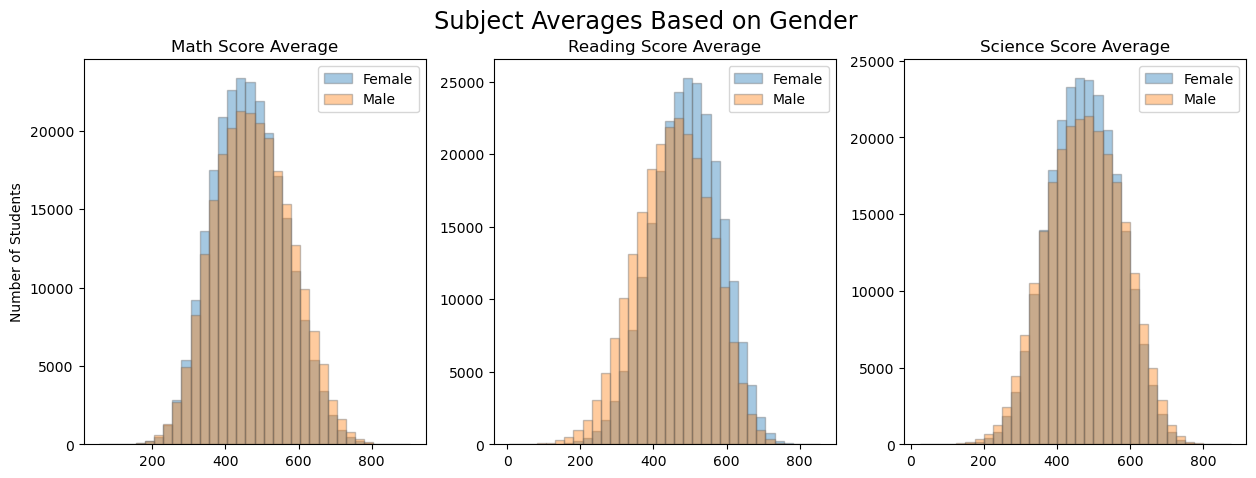

In [5]:
# First you want to select the bin size
binsize = 25

# Then you want to pick you the size of you figure and give your subplot a title
mplt.figure(figsize = (15,5))
mplt.suptitle('Subject Averages Based on Gender', size = 'xx-large')

# Math Score Average Plot
mplt.subplot(1, 3, 1)
bins=np.arange(min(modified_pisa_data['Math Score Average']),max(modified_pisa_data['Math Score Average'])+binsize, binsize)
mplt.title('Math Score Average')
mplt.hist(data=modified_pisa_data.query('Gender=="Female"'),x='Math Score Average', ec = 'dimgrey', alpha=.4,bins=bins,label='Female')
mplt.hist(data=modified_pisa_data.query('Gender=="Male"'),x='Math Score Average', ec = 'dimgrey', alpha=.4,bins=bins, label='Male')
mplt.ylabel('Number of Students')
mplt.legend();

# Reading Score Average Plot
mplt.subplot(1, 3, 2)
bins=np.arange(min(modified_pisa_data['Reading Score Average']),max(modified_pisa_data['Reading Score Average'])+binsize, binsize)
mplt.title('Reading Score Average')
mplt.hist(data=modified_pisa_data.query('Gender=="Female"'),x='Reading Score Average', ec = 'dimgrey', alpha=.4,bins=bins,label='Female')
mplt.hist(data=modified_pisa_data.query('Gender=="Male"'),x='Reading Score Average', ec = 'dimgrey', alpha=.4,bins=bins, label='Male')
mplt.legend();

# Science Score Average Plot
mplt.subplot(1, 3, 3)
bins=np.arange(min(modified_pisa_data['Science Score Average']),max(modified_pisa_data['Science Score Average'])+binsize, binsize)
mplt.title('Science Score Average')
mplt.hist(data=modified_pisa_data.query('Gender=="Female"'),x='Science Score Average', ec = 'dimgrey', alpha=.4,bins=bins,label='Female')
mplt.hist(data=modified_pisa_data.query('Gender=="Male"'),x='Science Score Average', ec = 'dimgrey', alpha=.4,bins=bins, label='Male')
mplt.legend();


This graph shows me that:
* The females perform better in the reading than the males.
* The males perform better than the females in maths.
* They both perform equally in Science.

But the differnces is not that huge so in a way we can say that they are evenly matched.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What is the correlation between the three subjects?
* Lastly I want to see how each subject correlate to one another.

<function matplotlib.pyplot.show(close=None, block=None)>

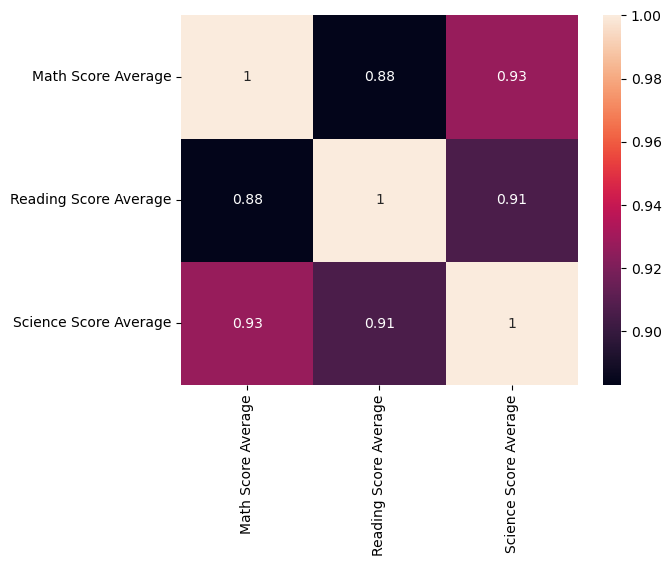

In [6]:
corr_avg = pd.DataFrame(modified_pisa_data, columns = ['Math Score Average', 'Reading Score Average', 'Science Score Average'])
sub_matrix = corr_avg.corr()
sb.heatmap(sub_matrix, annot = True)
mplt.show

* As expected there is a solid, strong and positive correlation between any pair of the three subjects to the scores of the three subjects. 
* Upon further inspection I see that even though they all have a strong positive correlation, the correlation between math and reading is the lowest and vice-versa. This could be because math isn't dependent on reading and vice_versa where as they both have an effect on the outcome of science. Because to be good in science you need to be good in both math and reading.

## Conclusion

* I learned that more females participated in the survey than males. Since the females performed better than the males when it came to Reading any country that had more female participants would have a better average in that. 
* The male participants performed better than the females when it came to Math and so any country that had more male participants would have a better average in that.
* They performed evenly equal when it came to Science, so the overall average depended on the number of factors such as gender participation when it came to that. This is because science is a mixture of both reading and maths so if you have more females the average favors them and vice-versa.

In [ ]:
!jupyter nbconvert Part_2_-_Explanatory_Data_Visualization.ipynb --to slides --post serve --no-input --no-prompt